[View in Colaboratory](https://colab.research.google.com/github/neoaksa/IMDB_Spider/blob/master/Movie_Analysis.ipynb)

In [0]:
# I've already uploaded three files onto googledrive, you can use uploaded function blew to upload the files.

# # upload
# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))


In [3]:
import pandas as pd
import numpy as np
import urllib.request
! pip install pydrive
# these classes allow you to request the Google drive API
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
from googleapiclient.discovery import build
from google.colab import auth

# authenticate google drive
auth.authenticate_user()
drive_service = build('drive', 'v3')
# 1. Authenticate and create the PyDrive client.
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def downloadFile(inputfilename,outputfilename):
    downloaded = drive.CreateFile({'id': inputfilename})
    # assume the file is called file.csv and it's located at the root of your drive
    downloaded.GetContentFile(outputfilename)
    
# traning file download
MovieItemFile = downloadFile("1w8Ce9An_6vJH_o5Ux7A8Zf0zc2E419xN","MovieItem.csv")
MovieReview = downloadFile("1R7kAHF9X_YnPGwsclqMn2_XA1WgVgjlC","MovieReview.csv")
MovieStar = downloadFile("15d3ZiHoqvxxdRhS9-5it979D0M60Ued0","MovieStar.csv")

df_movieItem = pd.read_csv('MovieItem.csv', delimiter=',',index_col=['id'])
df_movieReview = pd.read_csv('MovieReview.csv', delimiter=',',index_col=['id'])
df_movieStar = pd.read_csv('MovieStar.csv', delimiter=',',index_col=['id'])
# sort by index id(also known by rating)
df_movieItem = df_movieItem.sort_index(axis=0)
# overview
df_movieItem.describe()

,title,directors,writers,stars,stars_id,popularity,rating
count,250,250,250,250,250,250,250
unique,250,152,224,248,248,46,12
top,Ben-Hur,Martin Scorsese,['Charles Chaplin'],"['Mark Hamill', 'Harrison Ford', 'Carrie Fisher']","['nm0000434', 'nm0000148', 'nm0000402']",[],['8.1']
freq,1,7,5,3,3,50,67


In [4]:
# stars analysis
# pre-process for movieItem and movieStar
star_list = []
for index,stars in df_movieItem[['stars','stars_id']].iterrows():
    star_list += [(x.lstrip().replace('"',''),y.lstrip().replace('"','')) 
                  for x,y in zip(stars['stars'][1:-1].replace('\'','').split(','),stars['stars_id'][1:-1].replace('\'','').split(','))]
#     star_id_list += [x.lstrip().replace('"','') for x in stars['stars_id'][1:-1].replace('\'','').split(',')]
# reduce duplicate
star_list = list(set(star_list))
# create a dataframe for output
df_star = pd.DataFrame(columns=['stars_id','stars','avg_rating','num_movie'])
df_star['stars_id'] = [x[1] for x in star_list]
df_star['stars'] = [x[0] for x in star_list]
for index,star_id in enumerate(df_star['stars_id']):
    filter = df_movieItem['stars_id'].str.contains(star_id)
    df_star['num_movie'][index] = len(df_movieItem[filter])
    df_star['avg_rating'][index] = pd.to_numeric(df_movieItem[filter]['rating'].str[2:-2]).sum(axis=0)/df_star['num_movie'][index]
# left join star information
df_star
# order by # of movies
df_star = df_star.sort_values(['num_movie'],ascending=False)
print(df_star.head(10))
# order by avg rating
df_star = df_star.sort_values(['avg_rating'],ascending=False)
print(df_star.head(10))

      stars_id              stars avg_rating num_movie
40   nm0000134     Robert De Niro      8.375         8
214  nm0000148      Harrison Ford    8.34286         7
83   nm0000138  Leonardo DiCaprio        8.3         6
247  nm0000158          Tom Hanks    8.38333         6
430  nm0000122    Charles Chaplin       8.38         5
331  nm0000142     Clint Eastwood       8.28         5
390  nm0451148         Aamir Khan        8.2         5
321  nm0000071      James Stewart      8.375         4
277  nm0000199          Al Pacino       8.65         4
523  nm0000288     Christian Bale      8.525         4
      stars_id              stars avg_rating num_movie
127  nm0348409         Bob Gunton        9.2         1
62   nm0001001         James Caan        9.2         1
554  nm0000209        Tim Robbins        9.2         1
89   nm0001173      Aaron Eckhart          9         1
533  nm0005132       Heath Ledger          9         1
173  nm0000553        Liam Neeson        8.9         1
407  nm000

Accordig this breif table, we can find **Robert De Niro** took the most movies in top 250 list. Followed by **Harrison**,**Tom** and **Leonardo** .

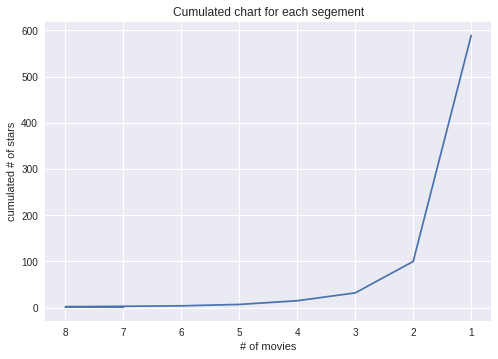

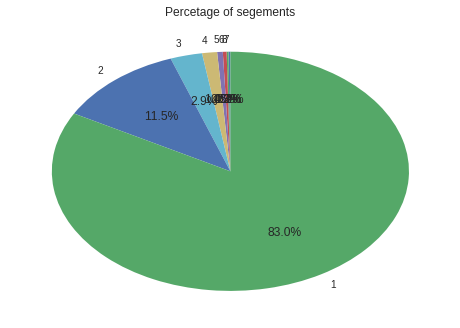

,title,directors,writers,stars,stars_id,popularity,rating
id,,,,,,,
2,The Shawshank Redemption,Frank Darabont,"['Stephen King', 'Frank Darabont']","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']","['nm0000209', 'nm0000151', 'nm0348409']",['80'],['9.2']
3,The Godfather,Francis Ford Coppola,"['Mario Puzo', 'Francis Ford Coppola']","['Marlon Brando', 'Al Pacino', 'James Caan']","['nm0000008', 'nm0000199', 'nm0001001']",['100'],['9.2']
4,The Godfather: Part II,Francis Ford Coppola,"['Francis Ford Coppola', 'Mario Puzo']","['Al Pacino', 'Robert De Niro', 'Robert Duvall']","['nm0000199', 'nm0000134', 'nm0000380']",['90'],['9.0']
5,The Dark Knight,Christopher Nolan,"['Jonathan Nolan', 'Christopher Nolan']","['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['nm0000288', 'nm0005132', 'nm0001173']",['82'],['9.0']
6,12 Angry Men,Sidney Lumet,"['Reginald Rose', 'Reginald Rose']","['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam']","['nm0000020', 'nm0002011', 'nm0000842']",['96'],['8.9']
7,Schindler's List,Steven Spielberg,"['Thomas Keneally', 'Steven Zaillian']","['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley']","['nm0000553', 'nm0000146', 'nm0001426']",['93'],['8.9']
8,The Lord of the Rings: The Return of the King,Peter Jackson,"['J.R.R. Tolkien', 'Fran Walsh']","['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...","['nm0000704', 'nm0001557', 'nm0005212']",['94'],['8.9']
9,Pulp Fiction,Quentin Tarantino,"['Quentin Tarantino', 'Roger Avary']","['John Travolta', 'Uma Thurman', 'Samuel L. Ja...","['nm0000237', 'nm0000235', 'nm0000168']",['94'],['8.9']
10,"The Good, the Bad and the Ugly",Sergio Leone,"['Luciano Vincenzoni', 'Sergio Leone']","['Clint Eastwood', 'Eli Wallach', 'Lee Van Cle...","['nm0000142', 'nm0908919', 'nm0001812']",['90'],['8.8']


In [5]:
# visual stars
import matplotlib.pyplot as plt
# figure = plt.figure()
ax1 = plt.subplot()
df_aggbyMovie = df_star[df_star['num_movie']>0].groupby(['num_movie']).agg({'stars_id':np.size})
df_aggbyMovie.columns.values[0] ='freq'
df_aggbyMovie = df_aggbyMovie.sort_values(['freq'])
acc_numMovie = np.cumsum(df_aggbyMovie['freq'])
ax1.plot(acc_numMovie)
ax1.set_xlabel('# of movies')
ax1.set_ylabel('cumulated # of stars')
ax1.set_title('Cumulated chart for each segement')
plt.gca().invert_xaxis()
plt.show()

ax2 = plt.subplot()
ax2.pie(df_aggbyMovie,
       labels=df_aggbyMovie.index,
       startangle=90,
       autopct='%1.1f%%')
ax2.set_title('Percetage of segements')
plt.show()

# check out which moive the best stars perform. - best stars: who took more than one movies in the top250 list
df_star_2plus = df_star[df_star['num_movie']>1]['stars_id']
i = 0
movie_list = []
for index,row in df_movieItem[['stars_id','title']].iterrows():
    for x in df_star_2plus.values:
        if x in row['stars_id']:
            i +=1
            movie_list.append(row['title'])
            break
df_movieItem[df_movieItem['title'].isin(movie_list)].head(10)

**165** movies in top 250 movies are performed by the **100** best stars who is defined that took more than one movies in the list. We picked up these 100 movie stars for future star research

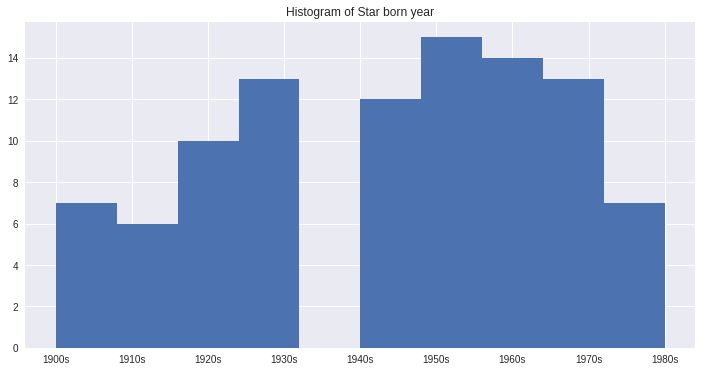

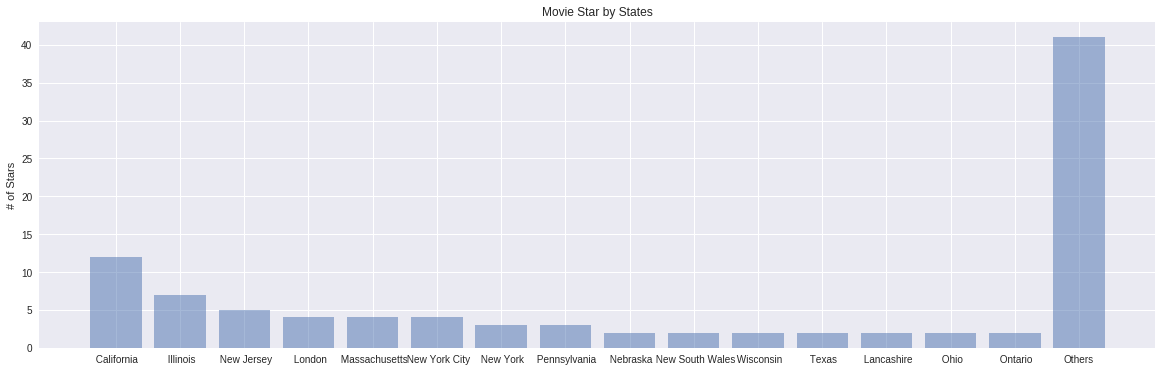

In [6]:
# pick 100 stars for age analysis
# rebin the year by 10 years
df_movieStar_bin = df_movieStar.copy()
df_movieStar_bin['name'] = df_movieStar_bin['name'].str[2:-2]
df_movieStar_bin['born_year'] = df_movieStar_bin['born_year'].str[2:-2]
df_movieStar_bin['born_area'] = df_movieStar_bin['born_area'].str[2:-2]
df_movieStar_bin['born_year'] = pd.cut(pd.to_numeric(df_movieStar_bin['born_year'].str[0:4]),range(1900,2020,10),right=False)
df_movieStar_bin = df_movieStar_bin.dropna()
df_movieStar_bin['born_year'] = df_movieStar_bin['born_year'].astype(str).str[1:5] + 's'
df_movieStar_bin = df_movieStar_bin[df_movieStar_bin.index.isin(df_star_2plus.values)]
fig = plt.figure(figsize=(12,6))
ax3 = plt.subplot()
ax3.hist(df_movieStar_bin['born_year'])
ax3.set_title('Histogram of Star born year')
plt.show()

# star city anlysis
df_movieStar_bin['born_state'] = [x.split(',')[1] for x in df_movieStar_bin['born_area']]
df_movieStar_by_state = df_movieStar_bin.groupby(['born_state']).size().sort_values(ascending=False)
df_movieStar_by_state = df_movieStar_by_state[df_movieStar_by_state>=2].append(
pd.Series(df_movieStar_by_state[df_movieStar_by_state<2].sum(),index=['Others']))
# print(df_movieStar_by_state)
fig = plt.figure(figsize=(20,6))
plt.bar(range(len(df_movieStar_by_state)), df_movieStar_by_state, align='center', alpha=0.5)
plt.xticks(range(len(df_movieStar_by_state)), df_movieStar_by_state.index)
plt.ylabel('# of Stars')
plt.title('Movie Star by States')
plt.show()


From picked 100 movie stars, most of them are born between **1930s to 1970s**. **California, Illinois, New Jersey ** are the states with most movie stars. Even so, none of state or regions is predominant.

[('wa', 13569), ('ha', 7003), ('time', 6689), ('scene', 4857), ('make', 4568), ('see', 4361), ('great', 4118), ('life', 4079), ('best', 3868), ('good', 3817), ('get', 3760), ('way', 3752), ('people', 3487), ('many', 3194), ('year', 2941), ('first', 2845), ('made', 2813), ('man', 2769), ('think', 2650), ('thing', 2649), ('seen', 2593), ('performance', 2588), ('love', 2534), ('go', 2501), ('know', 2418), ('say', 2384), ('end', 2355), ('dont', 2346), ('doe', 2330), ('work', 2329), ('world', 2253), ('watch', 2245), ('come', 2202), ('take', 2200), ('actor', 2162), ('feel', 1993), ('u', 1977), ('director', 1919), ('war', 1915), ('give', 1889), ('plot', 1877), ('action', 1865), ('find', 1832), ('much', 1819), ('part', 1806), ('something', 1794), ('look', 1776), ('role', 1731), ('little', 1698), ('real', 1689), ('show', 1680), ('acting', 1679), ('new', 1569), ('doesnt', 1562), ('want', 1550), ('point', 1524), ('day', 1478), ('audience', 1442), ('fact', 1424), ('lot', 1403), ('moment', 1399), (

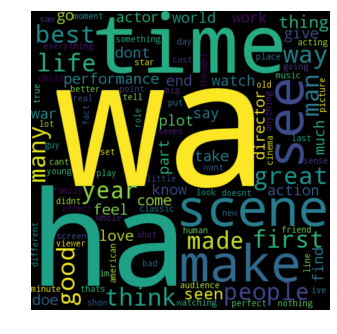

In [46]:
# review analysis
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

Lemmatizer = WordNetLemmatizer()

# remove punctuation
list_word = []
for text in df_movieReview['content'].values:
    nopunc = [char.lower() for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    list_word.append(nopunc)
words = []

print('2')
# setting words unuseful
del_words = ['movie','character','film','story']
word_type_list_In = ("NN" , "VB", "JJ") 
word_list_Ex = ("/", "br", "<", ">","be","movie","film","have","do","none","none none") # excluded words

words = {}
for sent in list_word:
    text = nltk.word_tokenize(sent)  # tokenize sentence to words
    text = [Lemmatizer.lemmatize(word) for word in text] # get stem of words
    text_tag = nltk.pos_tag(text) # get words type
    for item in [x[0] for x in text_tag if x[1][:2]  in word_type_list_In and x[0] not in del_words  and x[0] not in stopwords.words('english')]:
        if item not in words:
            words[item] = 1
        else:
            words[item] += 1

sorted_words = sorted(words.items(), key=lambda x: x[1],reverse=True)
print(sorted_words)
filtered_words = ' '.join([x[0] for x in sorted_words if x[1]>=1000])
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(filtered_words)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()